In [89]:
import numpy as np
import pandas as pd
import plotly.express as px

In [90]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
df2=pd.read_csv("ParisHousing.csv")
df2.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [91]:
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [92]:
test.tail()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
15149,37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2
15153,37883,18179,50,1,0,41,50124,2,2,2004,1,0,4163,9923,622,0,6


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [95]:
df2 = df2.reset_index()
df2["id"] = df2["index"] + 37883
df2.drop("index",axis=1,inplace=True)
df2

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,id
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,37883
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,37884
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,37885
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,37886
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,37887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,47878
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,47879
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,47880
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,47881


In [100]:
px.box(train,x="squareMeters",template="plotly_dark")

In [101]:
train_test=pd.concat([train,test,df2])

In [102]:
def fence(col):
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    col= col.map(lambda x: x if  lower_fence<x <upper_fence else col.mean())
    return col

In [103]:
train_test.iloc[:,:-1]

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,47878,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,47879,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,47880,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,47881,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [104]:
train_test.iloc[:,:-1]=train_test.iloc[:,:-1].apply(fence)

In [105]:
train_test

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291.0,24,1,0,47.0,35693.0,2,1,2000.0,0,1,8.0,5196.0,369.0,0,3,3436795.2
1,1,95145.0,60,0,1,60.0,34773.0,1,4,2000.0,0,1,729.0,4496.0,277.0,0,6,9519958.0
2,2,92661.0,45,1,1,62.0,45457.0,4,8,2020.0,1,1,7473.0,8953.0,245.0,1,9,9276448.1
3,3,97184.0,99,0,0,59.0,15113.0,1,1,2000.0,0,1,6424.0,8522.0,256.0,1,9,9725732.2
4,4,61752.0,100,0,0,57.0,64245.0,8,4,2018.0,1,0,7151.0,2786.0,863.0,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,47878,1726.0,89,0,1,5.0,73133.0,7,6,2009.0,0,1,9311.0,1698.0,218.0,0,4,176425.9
9996,47879,44403.0,29,1,1,12.0,34606.0,9,4,1990.0,0,1,9061.0,1742.0,230.0,0,0,4448474.0
9997,47880,83841.0,3,0,0,69.0,80933.0,10,10,2005.0,1,1,8304.0,7730.0,345.0,1,9,8390030.5
9998,47881,59036.0,70,0,0,96.0,55856.0,1,3,2010.0,0,1,2590.0,6174.0,339.0,1,4,5905107.0


In [106]:
px.box(train_test,x="price",template="plotly_dark")

In [107]:
colonlar = ["hasYard","hasPool","cityPartRange","numPrevOwners","isNewBuilt","hasStormProtector","hasStorageRoom","hasGuestRoom"]
for i in colonlar:
    print(train_test[i].value_counts(),"\n","-----"*9)

0    24655
1    23229
Name: hasYard, dtype: int64 
 ---------------------------------------------
0    25876
1    22008
Name: hasPool, dtype: int64 
 ---------------------------------------------
8     6410
5     5959
7     4778
2     4689
9     4683
4     4659
6     4556
3     4184
1     4118
10    3848
Name: cityPartRange, dtype: int64 
 ---------------------------------------------
5     5849
8     5330
9     5168
7     5032
4     5010
6     4957
3     4342
2     4333
1     3983
10    3880
Name: numPrevOwners, dtype: int64 
 ---------------------------------------------
0    25100
1    22784
Name: isNewBuilt, dtype: int64 
 ---------------------------------------------
0    25406
1    22478
Name: hasStormProtector, dtype: int64 
 ---------------------------------------------
0    25341
1    22543
Name: hasStorageRoom, dtype: int64 
 ---------------------------------------------
8     5917
4     4679
5     4561
7     4434
6     4410
2     4348
0     4229
9     4070
3     4043
10    3

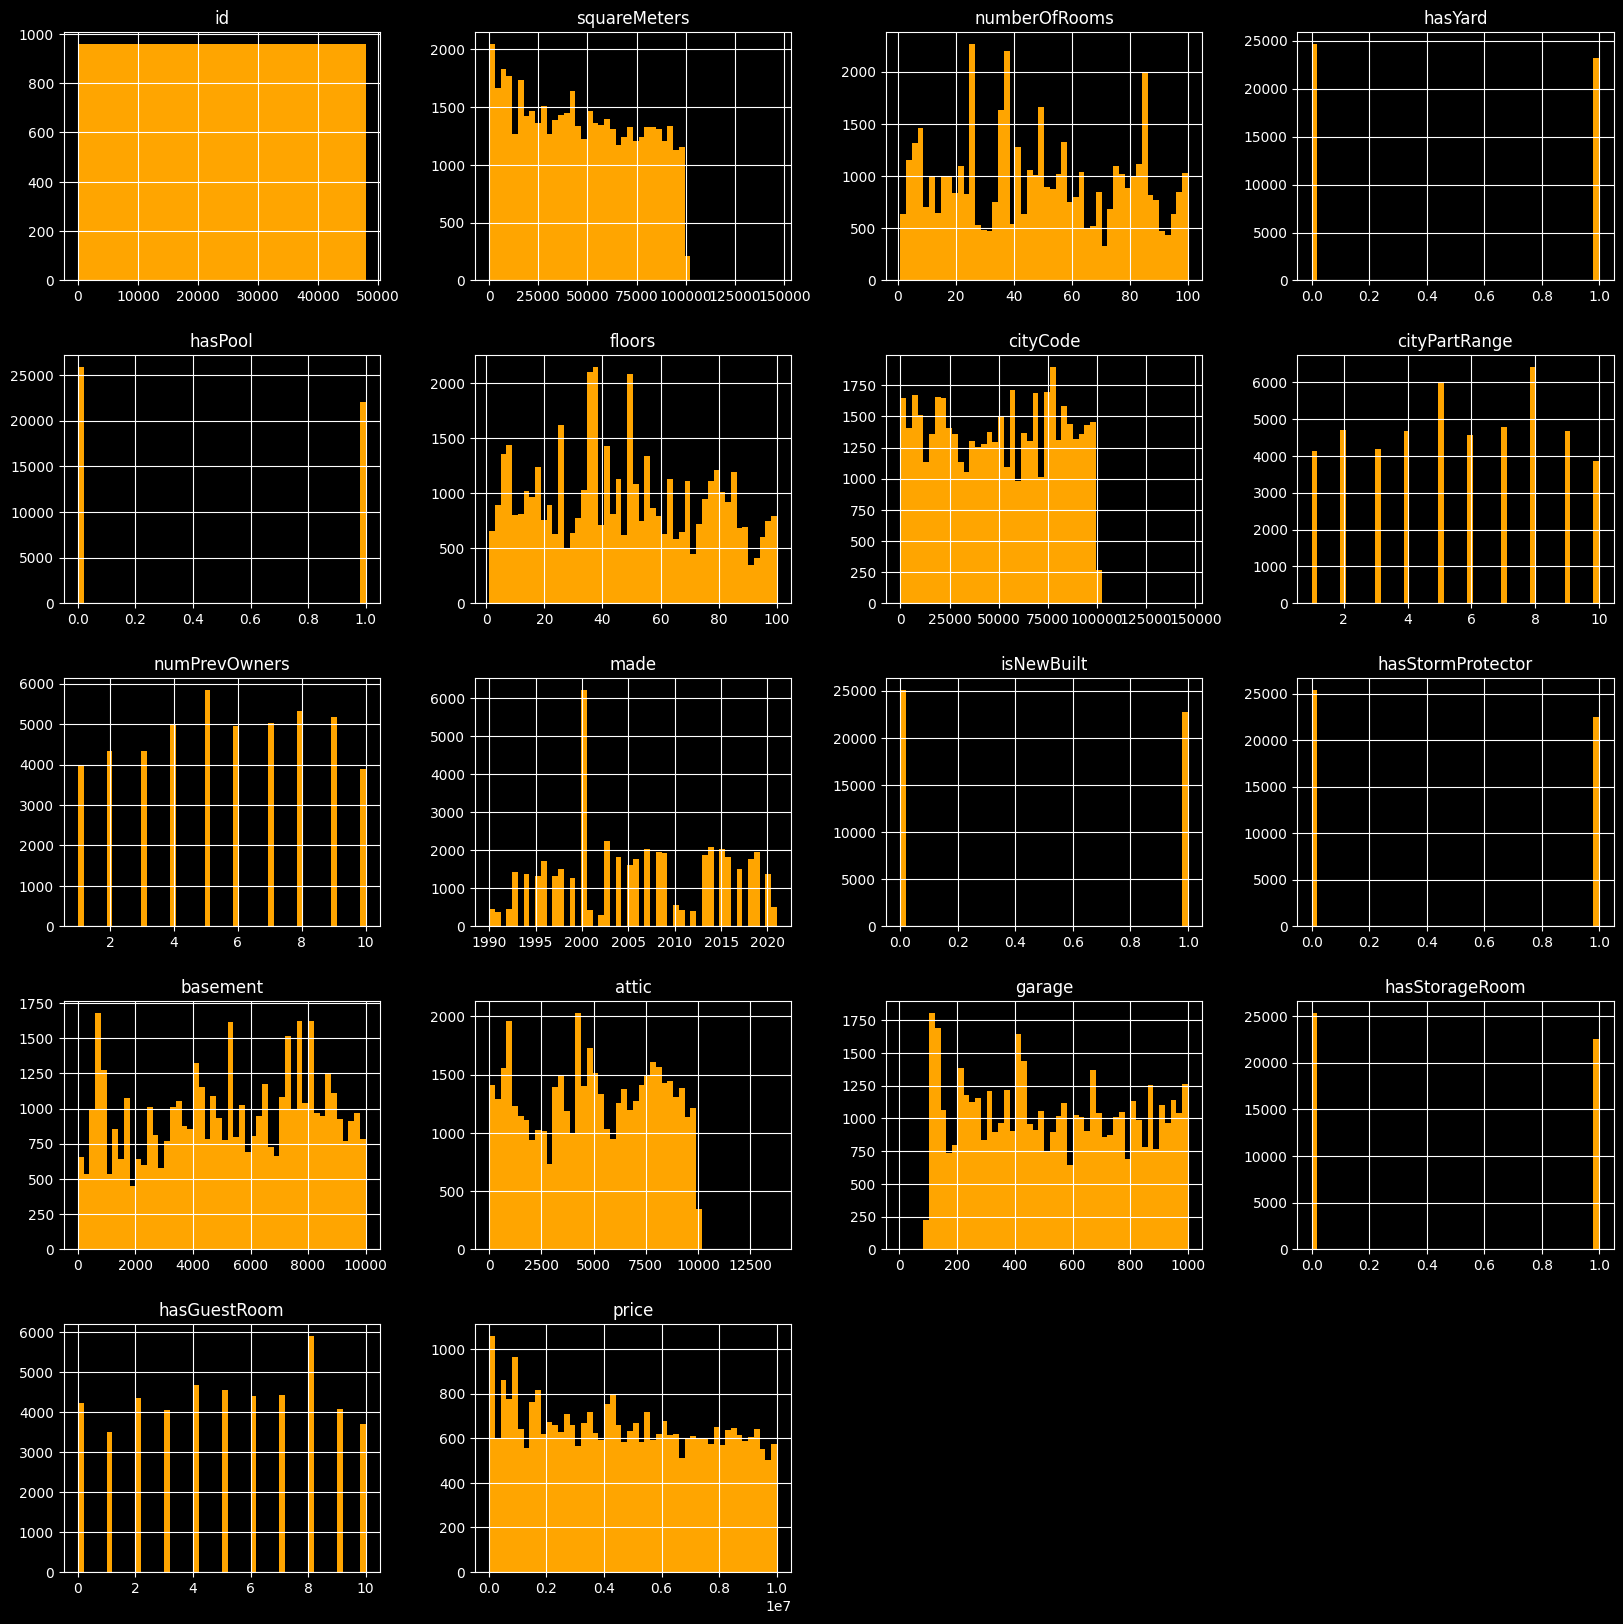

In [108]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
train_test.hist(bins = 50, figsize = (20,20),color="orange")
plt.show()

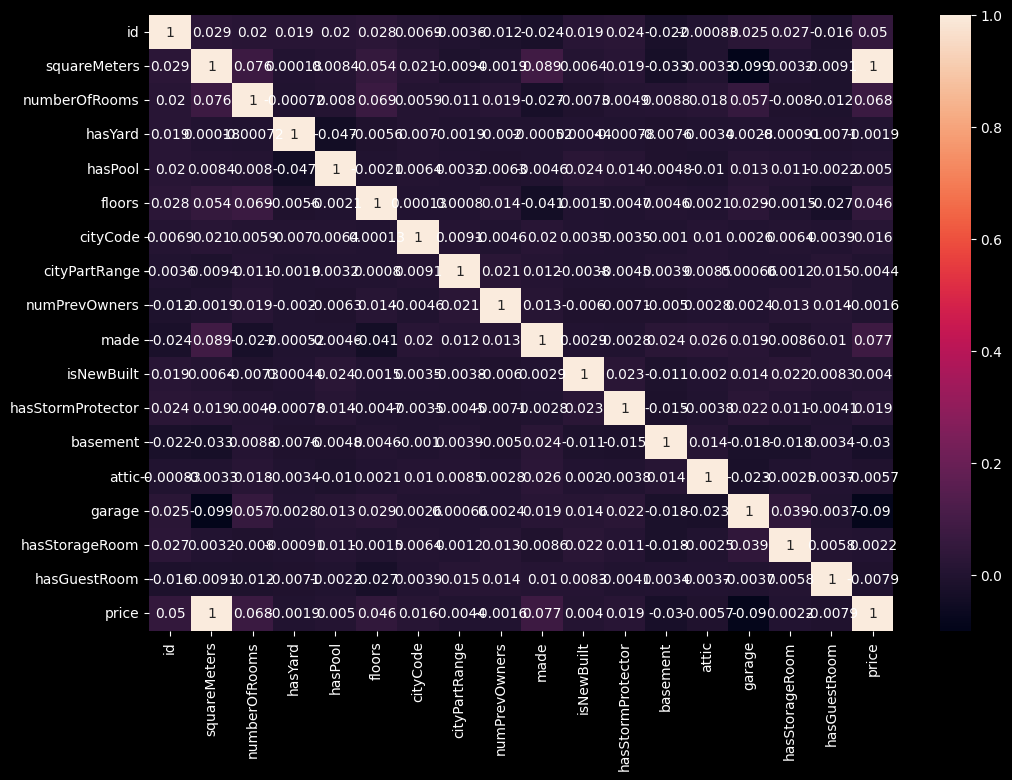

In [109]:
import seaborn as sns
corr = train_test.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

In [110]:
train_test.drop("cityCode",axis=1,inplace=True)
train = train_test[train_test['price'].notnull()]
test = train_test[train_test['price'].isnull()].drop("price",axis=1)

In [132]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('id')
num_cols.remove('price')

In [113]:
made=train.pivot_table(index="made",values="price",aggfunc=["mean","count"])
made.columns=["mean","count"]

In [114]:
made=made.reset_index()

In [115]:
made.head()

,made,mean,count
0,1990.0,5.152068e+06,394
1,1991.0,4.630189e+06,354
2,1992.0,5.263261e+06,415
3,1993.0,4.610424e+06,971
4,1994.0,4.127820e+06,940


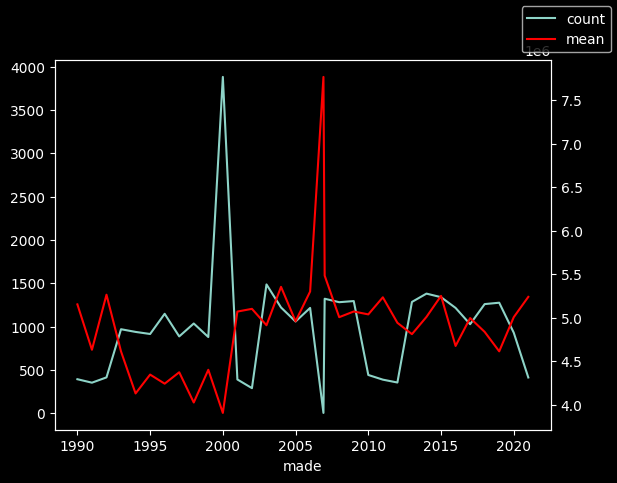

In [116]:
ax = made.plot(x="made", y="count", legend=False)
ax2 = ax.twinx()
made.plot(x="made", y="mean", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [117]:
made[made['made']<= 2000].corr()

,made,mean,count
made,1.000000,-0.786528,0.666095
mean,-0.786528,1.000000,-0.623068
count,0.666095,-0.623068,1.000000


In [118]:
made[made['made']> 2007].corr()

,made,mean,count
made,1.000000,-0.196491,0.031988
mean,-0.196491,1.000000,-0.417353
count,0.031988,-0.417353,1.000000


In [119]:
train.price.max() / train.price.min()

970.2594851408347

In [120]:
np.log(train.price.max())

16.118772541816003

In [121]:
train.attic.sort_values(ascending=False)

9115     10000.0
5991     10000.0
5907     10000.0
2014     10000.0
9864     10000.0
          ...   
1028         4.0
15667        1.0
4428         1.0
12810        1.0
7549         1.0
Name: attic, Length: 32730, dtype: float64

In [122]:
np.sqrt(train.attic).sort_values(ascending=False)

9115     100.0
5991     100.0
5907     100.0
2014     100.0
9864     100.0
         ...  
1028       2.0
15667      1.0
4428       1.0
12810      1.0
7549       1.0
Name: attic, Length: 32730, dtype: float64

In [123]:
px.box(train,x="attic",template="plotly_dark")

In [124]:
# train_test[["squareMeters","attic","basement"]]=np.sqrt(train_test[["squareMeters","attic","basement"]])

In [125]:
train_1 = train[train['made']<=2000]
test_1 = test[test['made']<=2000]
train_2 = train[(train['made']>=2001) & (train['made']<=2007)]
test_2 = test[(test['made']>=2001) & (test['made']<=2007)]
train_3 = train[train['made']>2007]
test_3 = test[test['made']>2007]

In [126]:
pd.merge(train_1,made[['made','count']], on = 'made', how = 'inner')

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,count
0,0,34291.0,24,1,0,47.0,2,1,2000.0,0,1,8.0,5196.0,369.0,0,3,3436795.2,3883
1,1,95145.0,60,0,1,60.0,1,4,2000.0,0,1,729.0,4496.0,277.0,0,6,9519958.0,3883
2,3,97184.0,99,0,0,59.0,1,1,2000.0,0,1,6424.0,8522.0,256.0,1,9,9725732.2,3883
3,15,31786.0,81,0,1,89.0,10,5,2000.0,0,0,4910.0,7143.0,435.0,1,4,3184469.0,3883
4,20,29271.0,46,0,0,12.0,8,1,2000.0,1,1,4343.0,3735.0,414.0,0,3,2938810.1,3883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11823,47718,76699.0,51,1,0,89.0,6,1,1992.0,1,0,1791.0,9620.0,229.0,0,2,7678118.2,415
11824,47768,74139.0,11,1,0,18.0,9,3,1992.0,0,0,1076.0,1403.0,257.0,1,9,7417297.2,415
11825,47785,12179.0,32,0,1,65.0,3,9,1992.0,1,1,4646.0,5840.0,796.0,0,6,1224992.2,415
11826,47865,41330.0,55,0,1,37.0,5,2,1992.0,0,1,6976.0,1090.0,828.0,0,7,4139270.2,415


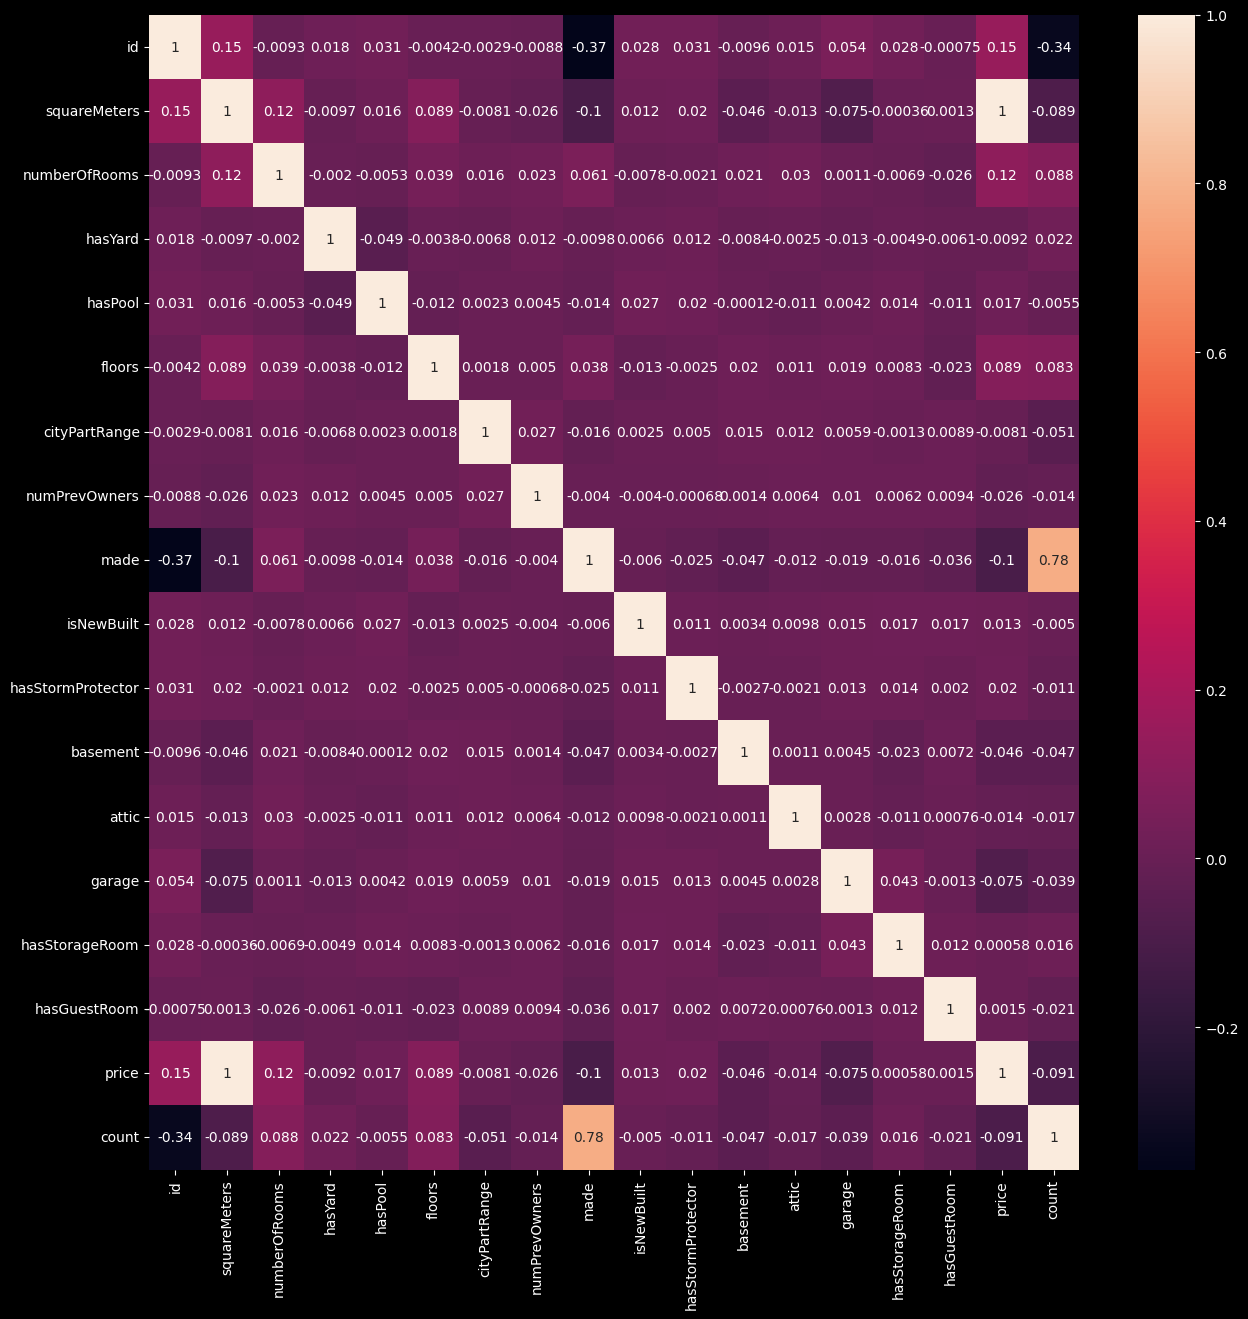

In [127]:
train_1 = pd.merge(train_1,made[['made','count']], on = 'made', how = 'inner')
test_1 = pd.merge(test_1,made[['made','count']], on = 'made', how = 'inner')
plt.figure(figsize=(15,15))
sns.heatmap(train_1.corr(),annot=True)
plt.show()

In [128]:
train_2 = pd.merge(train_2,made[['made','count']], on = 'made', how = 'inner')
test_2 = pd.merge(test_2,made[['made','count']], on = 'made', how = 'inner')
train_3 = pd.merge(train_3,made[['made','count']], on = 'made', how = 'inner')
test_3 = pd.merge(test_3,made[['made','count']], on = 'made', how = 'inner')

In [133]:
num_cols = num_cols + ['count']

In [134]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def neg_rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

from sklearn.metrics import make_scorer

make_scorer = (make_scorer(neg_rmse))

def get_score(model,X,y):
    n = cross_val_score(model,X,y,scoring =make_scorer,cv=20)
    return n.mean()

In [ ]:
from xgboost import XGBRegressor

X1 = train_1[num_cols]
y1 = train_1['price']


import optuna
def objective(trial):
    
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.6),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'booster': trial.suggest_categorical('booster',["gbtree"])
    }
    
    xgb = XGBRegressor(**param)

    score = cross_val_score(xgb, X1, y1, n_jobs=-1, cv=20,scoring=make_scorer)
    rmse = score.mean()
    return rmse

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='minimize')
study.optimize(objective, n_trials=10) # actually 100 trials

In [137]:
trial = study.best_trial
print(trial.value) # With 100 tries, the score (rmse) is much lower
print(trial.params)
xgbc1 = XGBRegressor(**trial.params)

93694.98780172945
{'max_depth': 7, 'learning_rate': 0.027203320083335373, 'n_estimators': 824, 'min_child_weight': 1, 'gamma': 0.9707705829061403, 'subsample': 0.9959283203531473, 'colsample_bytree': 0.9900059951201609, 'reg_alpha': 0.31294269134048236, 'reg_lambda': 0.5805790194490615, 'random_state': 724, 'booster': 'gbtree'}


In [138]:
X1 = train_1[num_cols]
y1 = train_1['price']


xgb1=xgbc1.fit(X1,y1)


X_test = test_1[num_cols]
prediction=xgb1.predict(X_test)

test_1['price'] = prediction
test_1

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,count,price
0,22730,47580.0,89,0,1,8.0,5,3,1995.0,0,0,6885.0,8181.0,241.0,0,8,916,4759153.5
1,22751,69856.0,47,0,1,26.0,1,8,1995.0,1,0,17.0,853.0,854.0,1,8,916,6981494.0
2,22755,23608.0,51,0,0,31.0,10,6,1995.0,1,0,6410.0,8153.0,945.0,1,8,916,2372502.0
3,22775,67724.0,11,1,1,64.0,2,10,1995.0,0,1,7448.0,1932.0,128.0,1,2,916,6773295.0
4,22815,50778.0,39,0,1,94.0,2,1,1995.0,0,0,5294.0,7178.0,614.0,0,2,916,5090448.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,35303,84696.0,45,0,0,14.0,7,4,1991.0,0,1,8681.0,5246.0,524.0,1,6,354,8465380.0
5585,35522,42630.0,34,0,1,25.0,9,7,1991.0,1,0,7976.0,331.0,236.0,0,0,354,4255535.0
5586,35686,18316.0,20,0,1,5.0,2,6,1991.0,0,0,6574.0,2166.0,127.0,1,5,354,1849344.5
5587,36267,41700.0,48,0,1,8.0,5,7,1991.0,0,0,743.0,7716.0,194.0,1,2,354,4167366.5


In [ ]:
X2 = train_2[num_cols]
y2 = train_2['price']
import optuna
def objective(trial):
    
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.6),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'booster': trial.suggest_categorical('booster',["gbtree"])
    }
    
    xgb = XGBRegressor(**param)

    score = cross_val_score(xgb, X2, y2, n_jobs=-1, cv=20,scoring=make_scorer)
    rmse = score.mean()
    return rmse

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='minimize')
study.optimize(objective, n_trials=10) # actually 100 trials

In [140]:
trial = study.best_trial
print(trial.value)
print(trial.params)
xgbc2 = XGBRegressor(**trial.params)

148678.347161901
{'max_depth': 2, 'learning_rate': 0.4659064567922476, 'n_estimators': 844, 'min_child_weight': 8, 'gamma': 0.05966724253219194, 'subsample': 0.7141358056030169, 'colsample_bytree': 0.6904378993025581, 'reg_alpha': 0.5409993387430637, 'reg_lambda': 0.40857077876771747, 'random_state': 127, 'booster': 'gbtree'}


In [141]:
XGB2=xgbc2.fit(X2,y2)

X_test = test_2[num_cols]
prediction=XGB2.predict(X_test)

test_2['price'] = prediction
test_2

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,count,price
0,22740,69567.0,38,0,0,11.0,8,3,2003.0,0,1,8194.0,8627.0,124.0,0,3,1488,7.009642e+06
1,22776,15351.0,34,0,0,10.0,3,6,2003.0,0,0,6341.0,5844.0,929.0,1,6,1488,1.531142e+06
2,22868,4198.0,6,1,0,80.0,3,8,2003.0,0,0,3795.0,4194.0,885.0,1,8,1488,4.447744e+05
3,22887,62064.0,86,1,1,35.0,2,3,2003.0,1,0,8000.0,2600.0,976.0,0,10,1488,6.178990e+06
4,22907,91618.0,4,0,0,36.0,8,3,2003.0,1,1,6484.0,2731.0,121.0,1,5,1488,9.137245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,36015,73748.0,84,0,0,32.0,5,2,2001.0,1,1,4309.0,7379.0,273.0,1,9,391,7.361645e+06
3226,36030,90170.0,63,1,1,20.0,9,5,2001.0,1,0,4196.0,2528.0,945.0,1,3,391,9.118176e+06
3227,36156,41700.0,8,0,0,64.0,7,9,2001.0,1,0,8163.0,8153.0,194.0,0,8,391,4.130060e+06
3228,36298,55620.0,61,1,1,90.0,3,4,2001.0,1,1,9867.0,7179.0,548.0,0,1,391,5.751948e+06


In [ ]:
X3 = train_3[num_cols]
y3 = train_3['price']

def objective(trial):
    
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.6),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'booster': trial.suggest_categorical('booster',["gbtree"])
    }
    
    xgb = XGBRegressor(**param)

    score = cross_val_score(xgb, X3, y3, n_jobs=-1, cv=20,scoring=make_scorer)
    rmse = score.mean()
    return rmse

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='minimize')
study.optimize(objective, n_trials=10) # actually 100 trials

In [143]:
trial = study.best_trial
print(trial.value)
print(trial.params)
xgbc3 = XGBRegressor(**trial.params)

104765.0357642976
{'max_depth': 4, 'learning_rate': 0.16150080638499079, 'n_estimators': 892, 'min_child_weight': 2, 'gamma': 0.6578369721395493, 'subsample': 0.9952817962211294, 'colsample_bytree': 0.900604353474298, 'reg_alpha': 0.5410582428831643, 'reg_lambda': 0.31765466894557254, 'random_state': 217, 'booster': 'gbtree'}


In [144]:

XGB3=xgbc3.fit(X3,y3)

X_test = test_3[num_cols]
prediction=XGB3.predict(X_test)

test_3['price'] = prediction
test_3

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,count,price
0,22733,16354.0,47,1,1,9.0,6,5,2019.0,1,1,705.0,5097.0,122.0,1,5,1277,1646105.375
1,22748,35423.0,52,1,1,24.0,6,8,2019.0,1,0,8486.0,4375.0,489.0,1,5,1277,3573184.750
2,22820,85256.0,74,0,1,39.0,1,1,2019.0,0,1,3945.0,5240.0,745.0,1,0,1277,8535611.000
3,22826,68847.0,74,1,1,80.0,10,6,2019.0,0,1,9789.0,9476.0,847.0,1,5,1277,6884643.500
4,22840,15815.0,13,1,1,7.0,7,3,2019.0,1,1,2494.0,8575.0,827.0,1,5,1277,1588555.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,36857,54484.0,38,1,1,78.0,8,6,2011.0,0,1,8235.0,8136.0,114.0,1,8,389,5463311.500
6331,37118,54484.0,25,1,0,94.0,4,5,2011.0,0,1,8163.0,8889.0,241.0,0,6,389,5478396.500
6332,37278,27949.0,84,1,0,94.0,5,9,2011.0,1,1,8578.0,9248.0,245.0,1,1,389,2765365.750
6333,37431,76932.0,85,0,1,89.0,5,4,2011.0,0,0,8767.0,8149.0,583.0,1,0,389,7698466.000


In [146]:
submission = pd.concat([test_1,test_2,test_3])
submission = submission[['id','price']]
submission = submission.sort_values(by = ['id'])
submission.to_csv('sub.csv',index = False)
submission.head() # with more trials the score is much better

,id,price
0,22730,4759153.500
402,22731,6214225.500
827,22732,9065635.000
0,22733,1646105.375
685,22734,6769901.000
